In [1]:
!python3 bitcoin.py # Returns a graph of bitcoin I guess?

Figure(640x480)


In [3]:
!head -10 bitcoin.csv

Date,Open,High,Low,Close,Volume,VWAP,TWAP,GWA_BTC
2014-04-01,467.27616213,488.62262576,467.27616213,479.56253758,74776.47884546,482.75743985,482.81552999,479.56253758
2014-04-02,479.19670871,494.29793349,431.31802927,437.07873479,114052.96112562,460.19242,465.93246647,437.07873479
2014-04-03,437.32653497,449.73809389,414.40617913,445.59703844,91415.08017749,432.28588464,433.28284059,445.59703844
2014-04-04,445.17960266,456.10045923,429.16150653,449.81125887,51147.27201926,443.45808586,443.92530961,449.81125887
2014-04-05,450.08019976,464.08814785,445.16065531,461.69507462,28449.19454264,452.52583215,452.94975543,461.69507462
2014-04-06,463.18017969,469.17143136,451.12949084,461.02185305,21720.64420186,460.92126202,460.88580469,461.02185305
2014-04-07,461.84002378,464.27296986,445.42650899,452.90177483,34949.20300877,455.31560897,455.750201,452.90177483
2014-04-08,450.06502404,462.72664785,447.96045109,452.89854533,24290.13784046,453.96422843,453.90327305,452.89854533
2014-04-09,454.861

In [1]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import random
import neuralnetworks as nn

In [2]:
def csv_read(filename):
	with open(filename, 'r') as f:
		reader = csv.reader(f)
		matrix = list(reader)
	return matrix

In [3]:
data = pandas.read_csv("./bitcoin.csv")
data = data.drop(['Date'], axis=1)
data.shape

(1423, 8)

In [4]:
data = data.dropna()
data.shape

(1423, 8)

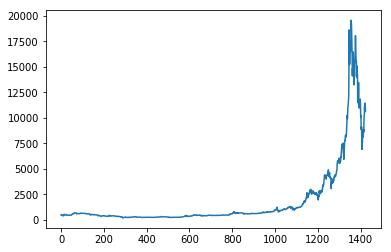

In [12]:
plt.plot(data['Close'])
plt.show()

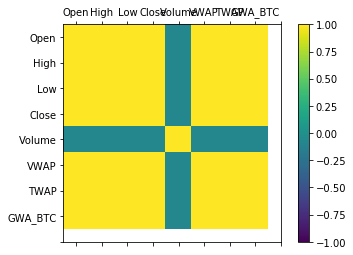

In [13]:
correlations = data.corr()
names = data[0:]
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

##### Seem's sketchy. Let's throw out volume anyway

In [14]:
data = data.drop(['Volume'], axis=1)
data.shape

(1423, 7)

In [15]:
T = data[['Close']]
T = np.array(T)
X = data.drop(['Close'], axis=1)
X = np.array(X)
(X.shape, T.shape)

((1423, 6), (1423, 1))

In [16]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((1138, 6), (1138, 1), (285, 6), (285, 1))

In [17]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1             2
0                      0  3.821913e-09  2.771567e-09
1                    [1]  4.319135e+01  4.932487e+01
2                 [1, 1]  7.230315e+01  8.214103e+01
3              [1, 1, 1]  9.713612e+01  1.110633e+02
4           [1, 1, 1, 1]  1.321520e+02  1.494384e+02
5        [1, 1, 1, 1, 1]  1.346074e+02  1.574407e+02
6                    [5]  9.130580e+00  1.231020e+01
7                 [5, 5]  1.244034e+01  1.209555e+01
8              [5, 5, 5]  1.699939e+01  1.740039e+01
9           [5, 5, 5, 5]  1.203864e+01  9.470171e+00
10       [5, 5, 5, 5, 5]  1.910695e+01  2.304476e+01
11                  [10]  9.15

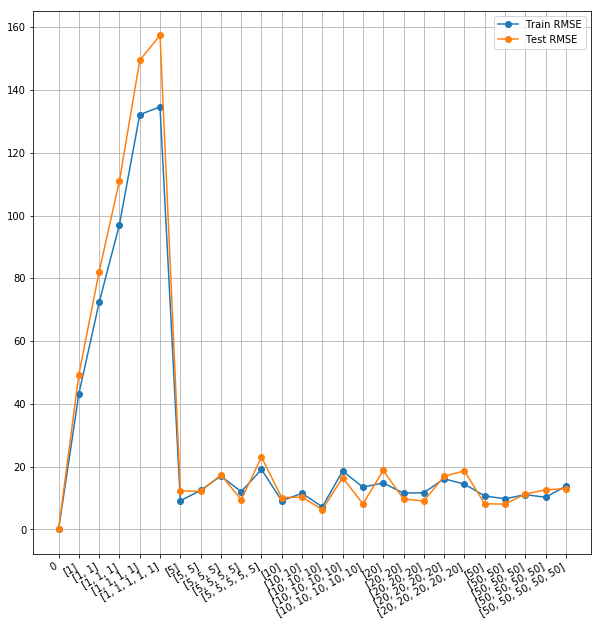

In [18]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pandas.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

##### I don't like this. I'm going to try to use closing prices for 21 days as the columns for X and closing price for "7 days in the future" as the column of T

In [5]:
T = data[['Close']]
T = T.transpose()
T = np.array(T)
T.shape

(1, 1423)

In [9]:
X = []
for i in range(1, T.shape[1] - 28):
    X.append(T[0, i:i+21])
X = np.array(X)
X.shape

(0,)

In [7]:
T = np.array(np.transpose(T))
T = T[29:]
T.shape

(1394, 1)

In [98]:
X[1]

array([ 445.59703844,  449.81125887,  461.69507462,  461.02185305,
        452.90177483,  452.89854533,  449.30209549,  366.7656655 ,
        421.7872042 ,  422.20811594,  414.53881419,  458.40993411,
        521.64049935,  528.22791349,  495.85680143,  480.70761067,
        502.30937637,  498.97754757,  496.12340416,  490.11233704,
        491.53440769])

In [99]:
T[1]

array([ 461.15662569])

##### Should be predicting 8 days in advance

In [100]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((1115, 21), (1115, 1), (279, 21), (279, 1))

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0           1           2
0                      0  670.021510  820.915269
1                    [1]  558.017711  768.797235
2                 [1, 1]  558.259929  770.430791
3              [1, 1, 1]  559.111352  775.049711
4           [1, 1, 1, 1]  558.964292  778.085382
5        [1, 1, 1, 1, 1]  559.586481  778.225684
6                    [5]  280.666467  555.945035
7                 [5, 5]  245.130945  424.543248
8              [5, 5, 5]  289.578699  540.355595
9           [5, 5, 5, 5]  353.582497  639.849624
10       [5, 5, 5, 5, 5]  354.359787  645.294604
11                  [10]  256.361347  537.686963
12              [10, 10]  259

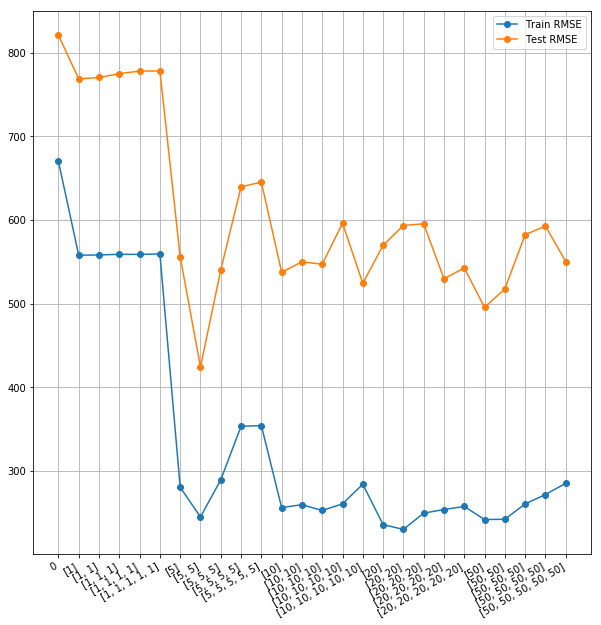

In [101]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pandas.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

##### I've no clue how this is predicting so freaking badly lol

hiddens = [20, 20]
nIterations = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 10000]
           0           1           2
0   [20, 20]  849.226819  951.974483
1   [20, 20]  640.706250  728.837825
2   [20, 20]  545.439695  678.142844
3   [20, 20]  476.958827  671.601439
4   [20, 20]  400.838498  672.406688
5   [20, 20]  380.452972  629.164813
6   [20, 20]  375.308160  617.469742
7   [20, 20]  325.878127  584.133489
8   [20, 20]  281.401829  603.964569
9   [20, 20]  278.797520  582.764317
10  [20, 20]  285.181909  535.591224
11  [20, 20]  252.237328  518.935599
12  [20, 20]  193.886989  530.641964
13  [20, 20]  130.359320  475.712811
14  [20, 20]   48.173664  694.813417


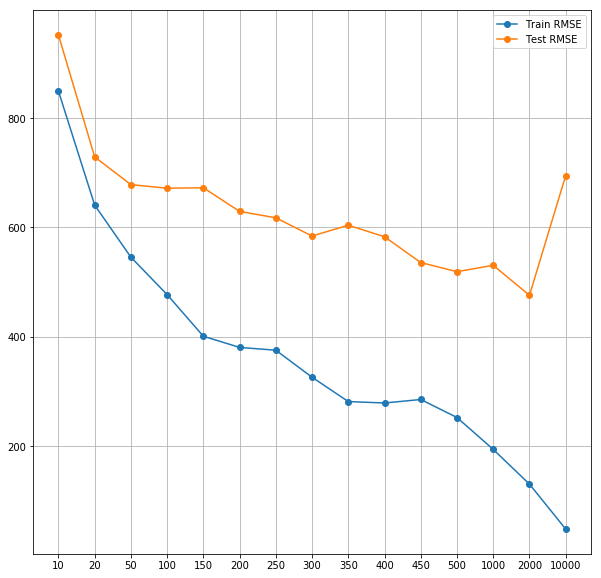

In [103]:
errors = []
hiddens = [20,20]
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 10000]
print('hiddens =', hiddens)
print('nIterations =', nIterationsList)
for iters in nIterationsList: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iters)
    errors.append([hiddens, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pandas.DataFrame(errors)


print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

### Fuckit. Lets use 2000 iterations and see what our algorithm does with the data 28 days ago.

In [154]:
T = data[['Close']]
T = T.transpose()
T = np.array(T)
X = []
for i in range(1, T.shape[1] - 28):
    X.append(T[0, i:i+21])
X = np.array(X)
X.shape
T = np.array(np.transpose(T))
T = T[29:]
T.shape

(1394, 1)

In [155]:
Xtrain = X[0:-28]
Ttrain = T[0:-28]
(Xtrain.shape, Ttrain.shape)

((1366, 21), (1366, 1))

In [156]:
Xtest = X[len(X)- 1: len(X), :] # Should predict 10682

In [157]:
nnet = nn.NeuralNetwork(X.shape[1], [20,20], T.shape[1])
nnet.train(Xtrain, Ttrain, 2000)
nnet.use(Xtest)

array([[ 10085.65711958]])

##### Off by $600